In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from textblob import TextBlob
import seaborn as sns

from sklearn.model_selection import train_test_split
import tensorflow as tf

In [16]:
dataset=pd.read_csv('dataset.csv')
#dataset = pd.read_csv('/kaggle/input/200k-short-texts-for-humor-detection/dataset.csv')
dataset

text=dataset.text.to_list()

In [31]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='"&(),-/:;<=>[\\]_`{|}~\t\n0123456789',
                      lower=True, split=' ')
tokenizer.fit_on_texts(np.array(dataset['text']))
vocab_size = len(tokenizer.word_index) + 1

word_len=[]
for i in range(len(dataset)):
    word_len.append(len(dataset.text[i].split(' ')))

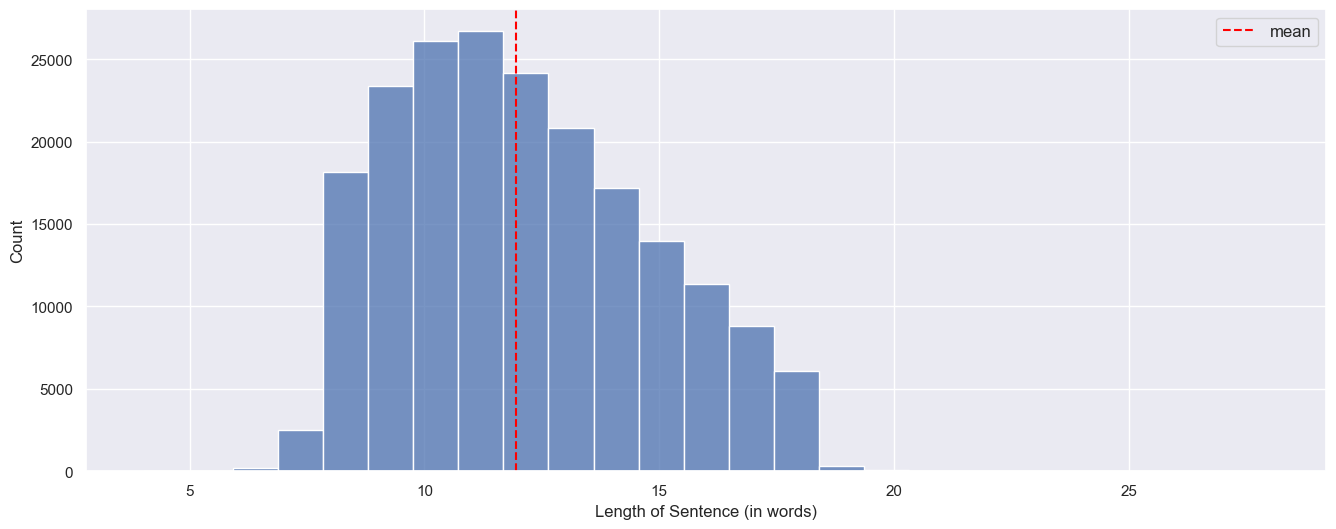

In [6]:
lengths=[]
for x in range(len(dataset)):
    i = dataset['text'][x]
    i = tokenizer.texts_to_sequences([i])
    lengths.append(len(i[0]))
lengths = np.array(lengths)
sns.set(rc={'figure.figsize':(16,6)})
fig = sns.histplot(lengths, kde=False, bins=25)
plt.xlabel('Length of Sentence (in words)')
plt.axvline(x=lengths.mean(),
            color='red',ls='--', label="mean")
plt.legend(loc='upper right', prop={'size': 12})
plt.show(fig)

In [22]:

train_seq=tokenizer.texts_to_sequences(text)

In [23]:
text_padded = tf.keras.preprocessing.sequence.pad_sequences(
    train_seq,
    maxlen=lengths.max(),
    dtype='int32',
    padding='post',
    truncating='post',
    value=0.0
)

In [24]:
len(text_padded)

200000

In [27]:
X_train, X_test, Y_train, Y_test= train_test_split(text_padded, dataset.humor,
                                                  test_size=0.2, random_state=1729)



In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM, Dense, Bidirectional,InputLayer,Embedding, Flatten,Input,Dropout

In [33]:
model=tf.keras.Sequential()

model.add(Input(shape=[lengths.max()]))
model.add(Embedding(word_len.max(),128,input_length=lengths.max()))    

model.add(LSTM(200, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(200, return_sequences=True))
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(1,activation='sigmoid')) #output layer
model.summary()

AttributeError: 'list' object has no attribute 'max'